# Linear Regression DNN

In [1]:
# Import Library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Create Train Data
data = np.arange(0, 20, 2)
label = np.arange(2,52,5)
print(data)
print(label)

[ 0  2  4  6  8 10 12 14 16 18]
[ 2  7 12 17 22 27 32 37 42 47]


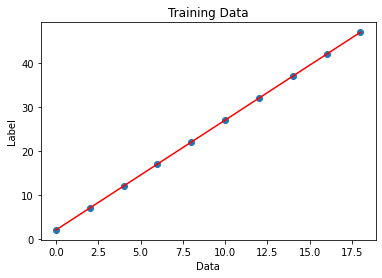

In [3]:
# Plot of Train Data
plt.scatter(data, label)
plt.plot(data, label,c='r')
plt.xlabel('Data')
plt.ylabel('Label')
plt.title("Training Data")
plt.show()

## Build Architecture Model Machine Learning

In [4]:
# Import Library Machine Learning
from keras import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from keras.losses import mae
from keras.optimizers import Adam


In [5]:
# Build Architecture Model
model = Sequential()
model.add(InputLayer(input_shape=1))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                160       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 6,721
Trainable params: 6,721
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile Model
model.compile(loss=mae,optimizer=Adam())

In [7]:
# Make Callback
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.04):
            self.model.stop_training = True

In [8]:
# Train model with 200 epochs
history = model.fit(tf.expand_dims(data, axis=-1), tf.expand_dims(label, axis=-1), epochs=200,callbacks=[callback()])

Epoch 1/200
1/1 [==============================] - 0s 383ms/step - loss: 22.5402
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 22.1928
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 21.8444
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 21.5051
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 21.1753
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 20.8424
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 20.5120
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 20.1744
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 19.8333
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 19.5109
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 19.1867
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 18.8680
Epoch 13/200
1/1 [=============================

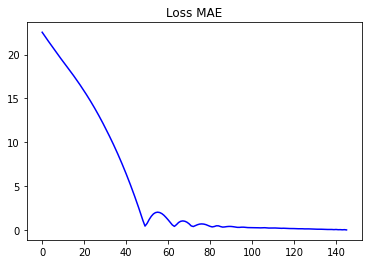

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot of Loss Mean Absolute Error
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss,c= 'b')
plt.title('Loss MAE')
plt.figure()
plt.show()

## Prediction Value

predict next 10 value

In [10]:
# Create Test Value
x_test = np.arange(20, 40, 2)
y_test = np.arange(52,100,5)
print(x_test)
print(y_test)

[20 22 24 26 28 30 32 34 36 38]
[52 57 62 67 72 77 82 87 92 97]


In [11]:
# Predict Each Test Value
predict=[]

for index in x_test:
    value = tf.expand_dims(index , axis=0)
    predict.append(model.predict(value))
    
predict

1/1 [==============================] - 0s 14ms/step


[array([[52.085373]], dtype=float32),
 array([[57.099174]], dtype=float32),
 array([[62.112988]], dtype=float32),
 array([[67.126816]], dtype=float32),
 array([[72.14061]], dtype=float32),
 array([[77.15443]], dtype=float32),
 array([[82.16824]], dtype=float32),
 array([[87.18206]], dtype=float32),
 array([[92.19587]], dtype=float32),
 array([[97.20968]], dtype=float32)]

In [12]:
# Join first value and test value
real_x = np.concatenate((data,x_test))
real_y =np.concatenate((label,y_test))

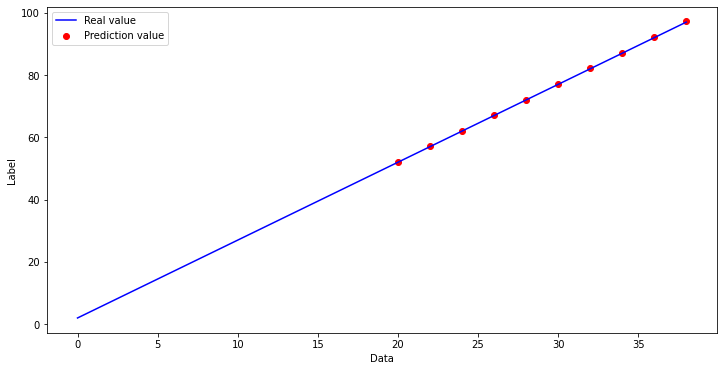

In [13]:
# Plot of Prediction Value
plt.figure(figsize=(12,6))
plt.plot(real_x, real_y, c="b", label="Real value")
plt.scatter(x_test, predict,c='r', label="Prediction value")
plt.xlabel('Data')
plt.ylabel('Label')
plt.legend()
plt.show()

In [14]:
# Save Model
model.save('model1.h5')